> We are going to use the `USA_Housing` or `sample_data/california_housing...` dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house

Let's try and create a model that can predict the price of a house based on the variables and historical data


# Import standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df_house = pd.read_csv("USA_Housing.csv")

## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names

Questions:

## What is the dependent variable (column name)?
The dependent variable must be ['Price']
Because we want to predict the price of house depending on the features of the house.

## What are the independent variables?

Address is excluded due to it being a textual representation

Must be: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Address']
       
## Should we normalize the data?

Linear regression is sensitive to feature scale:
A feature like "Area (in sqft)" may be in thousands
Another like "Number of bedrooms" may be in single digits

## What are the column data-types?

Float64, however Address is object - so Address is textual and unique for each house.

In [3]:
print(df_house.head())
print(df_house.describe())
print(df_house.info())
print(df_house.columns)

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

##  What are the assumptions of the linear regression model?

That our data can be described by a linear model (e.g, a line).

##  Can we accept the basic assumptions of the linear regression model?

Yes, the data is scattered in a way that you can describe it with linear regression. (e.g. Avg. Area Income - Price)

##  Judging by the scatter-plots, do you see any patterns in the data?

The data is scattered in a way that you can describe it with linear regression. (e.g. Avg. Area Income - Price)


##  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?

Avg. Area Income is related to Price (means: The area's income you live in has a correlation with the price of the house sold)

Avg. Number of Bedrooms is not really correlated to Price. E.g. a house with 5 bedrooms could still have been sold for an extremly low price.

##  Are there correlations among independent variables?

Mostly not, but you can see that the avg. number of bedrooms is correlated avg. number of rooms 
(likely because a bedroom is considered a room - however, a room may not be considered a bedroom)


In [4]:
df_house = df_house.drop('Address', axis=1)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

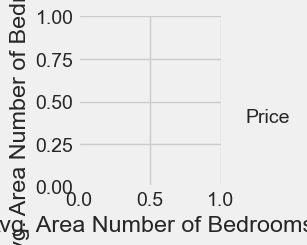

In [6]:
sns.pairplot(df_house[['Avg. Area Number of Bedrooms', 'Price']], hue="Price")
plt.show()

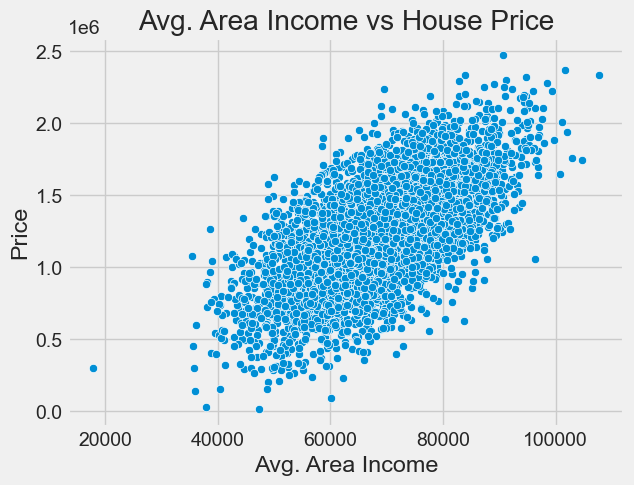

In [7]:
sns.scatterplot(data=df_house, x='Avg. Area Income', y='Price')
plt.title('Avg. Area Income vs House Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()


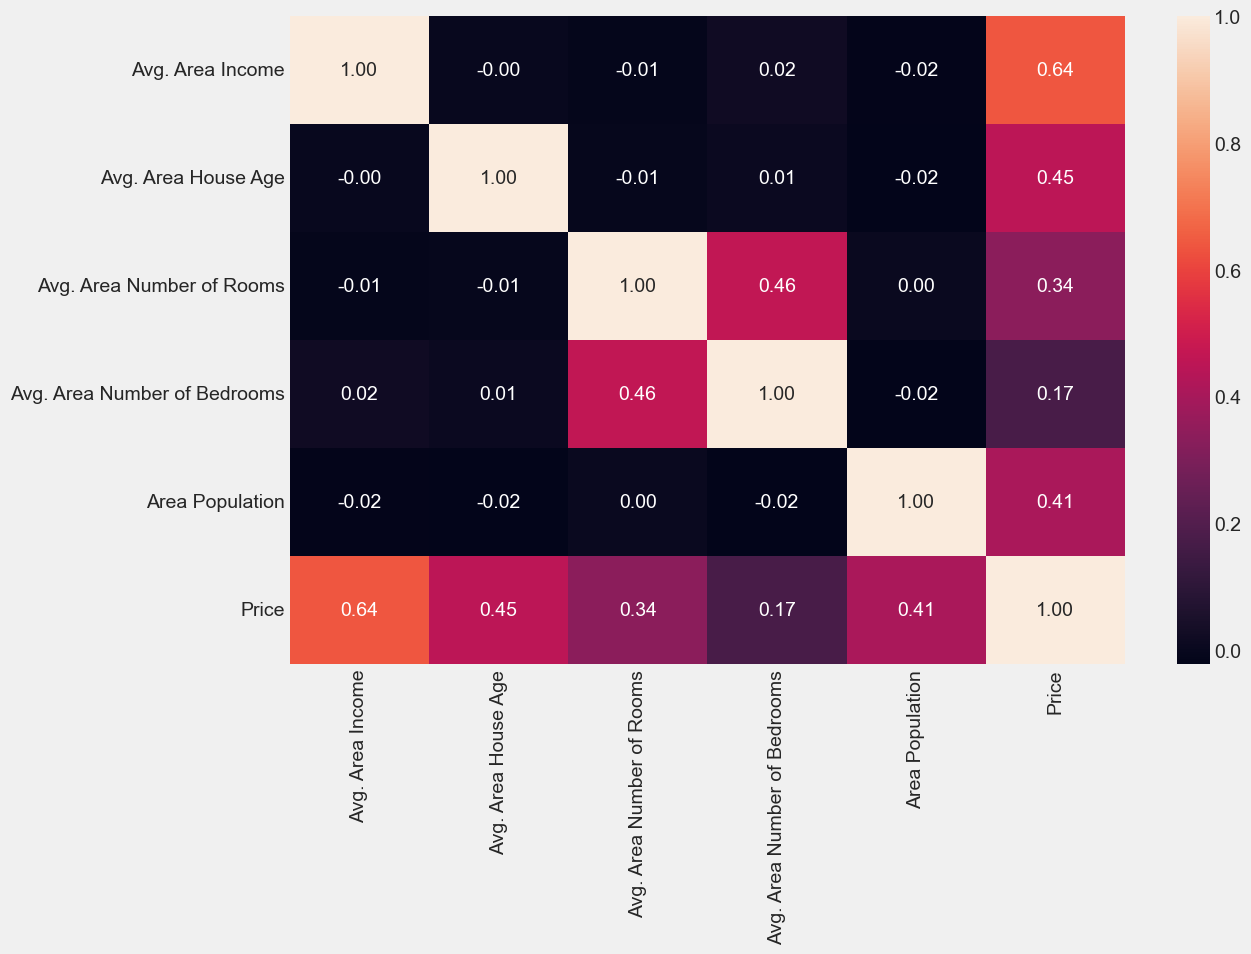

In [8]:
df_correlation = df_house.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_correlation, annot=True, fmt=".2f")
plt.show()

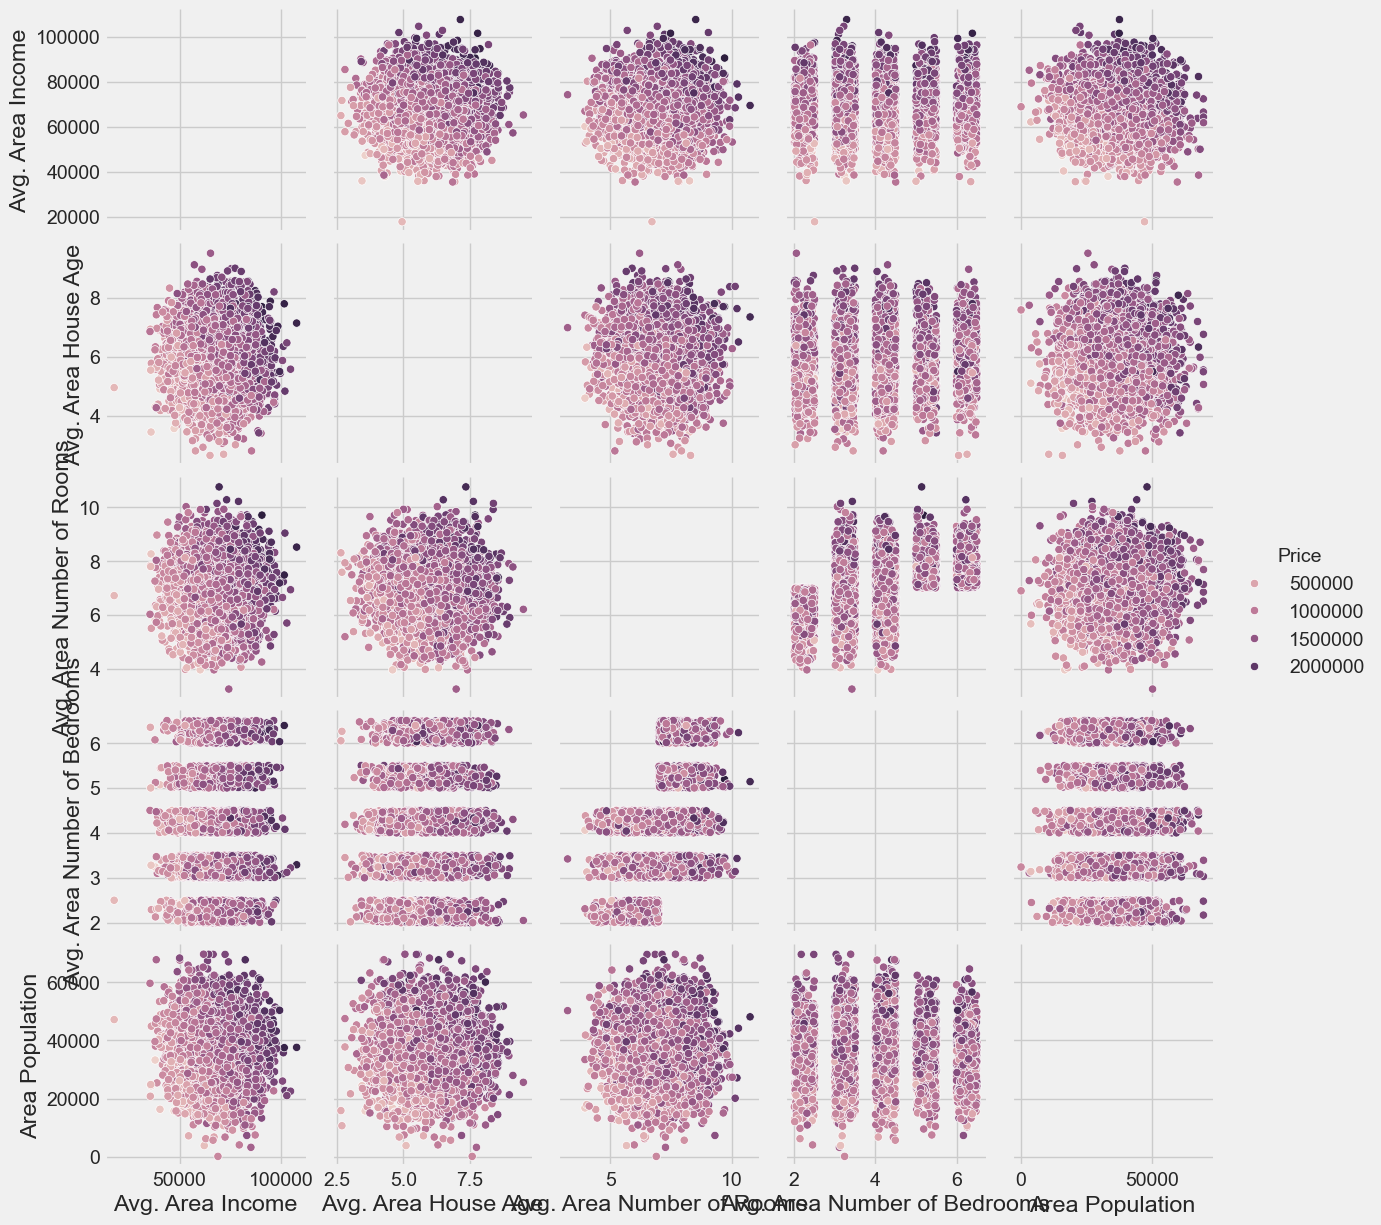

In [9]:
sns.pairplot(df_house, hue="Price")
plt.show()

# Training a Linear Regression Model
## X and y arrays

Tasks:

1. Split the data-frame into an `X` array and and `y` array
2. Are all columns useful for linear regression? Is there some that should be excluded? Exclude the useless ones

## Train / Test Split

We need to split the data into the train and test subsets.

In [10]:
from sklearn.model_selection import train_test_split

# Split the data here
X = df_house.drop('Price', axis=1)
y = df_house['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
print(len(df_house))
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

5000
X_train shape: (4000, 5)
X_test shape: (1000, 5)
y_train shape: (4000,)
y_test shape: (1000,)


In [12]:
from sklearn import metrics

def print_evaluate(true, predicted):
    mae, mse, rmse, r2_square = evaluate(true, predicted)
    #Print mean absolute error
    print('MAE:', mae)
    #Print mean square error
    print('MSE:', mse)
    # Print root square error
    print('RMSE:', rmse)
    # Print R2 score
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.

Assess the following steps using the plots you made earlier and answer whether the assumtions and conditions are being met:

- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).

Answer:

- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

Answer:

- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

Answer:



In [13]:
# Hint:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Linear Regression

Take the most correlated dependent/independent pair and calculate the `beta` parameters for Simple linear regression.

Use `skitlearn` to fit the linear model and see if your calculation corresponds to what the library did.

Use `skitlearn` to fit the linear model dependent on all independent variables (normalize inputs).

In [14]:
x = df_house['Avg. Area Income']
y = df_house['Price']

# Calculate beta_1 and beta_0 manually
x_mean = x.mean()
y_mean = y.mean()

beta_1 = ((x - x_mean) * (y - y_mean)).sum() / ((x - x_mean) ** 2).sum()
beta_0 = y_mean - beta_1 * x_mean

print("Manual β0:", beta_0)
print("Manual β1:", beta_1)

Manual β0: -221579.4782059181
Manual β1: 21.19548317193168


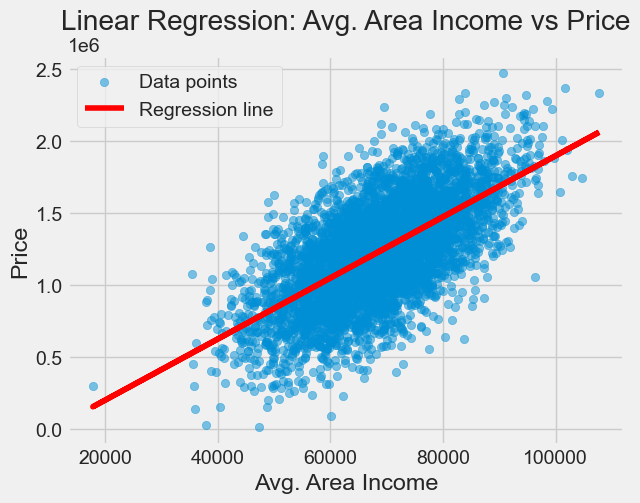

In [15]:
# Scatter plot of the data
plt.scatter(x, y, alpha=0.5, label='Data points')

# Regression line
y_pred_line = beta_0 + beta_1 * x
plt.plot(x, y_pred_line, color='red', label='Regression line')

plt.title('Linear Regression: Avg. Area Income vs Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Normalize the inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

## Model Evaluation


Compare the error from models that used only one independent variable vs. the model that used several independent variables. Did we gain anything from including extra independent dimensions?

In [17]:
x_test_simple = X_test['Avg. Area Income']

# Step 2: Predict using simple model
y_pred_simple = beta_0 + beta_1 * x_test_simple

# Step 3: Evaluate
print_evaluate(y_test, y_pred_simple)

MAE: 217802.21672884392
MSE: 74165430706.10806
RMSE: 272333.30810994835
R2 Square 0.408262457975336
__________________________________


In [18]:
print_evaluate(y_test, y_pred)

MAE: 81519.12828407687
MSE: 10454403229.54705
RMSE: 102246.77613278107
R2 Square 0.9165883240818637
__________________________________


## Predictions from our Model

Tasks:

1.  Take the test data and plot the predicted vs. true value scatter plot.

2.  Plot the histogram of residual values

3.  Make a scatter plot of residuals depending on the predicted value.

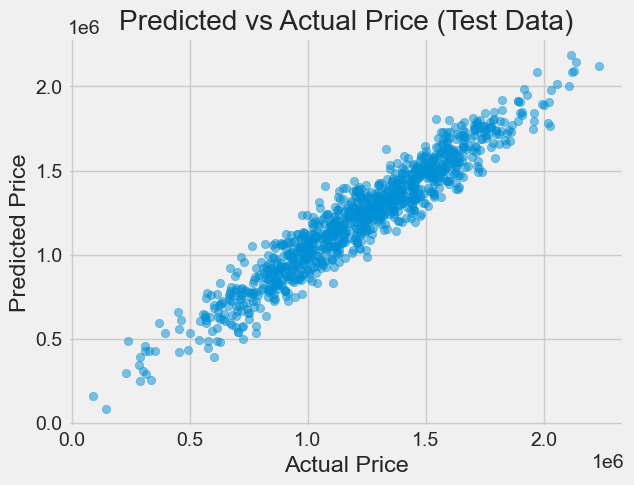

In [19]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price (Test Data)")
plt.grid(True)
plt.show()

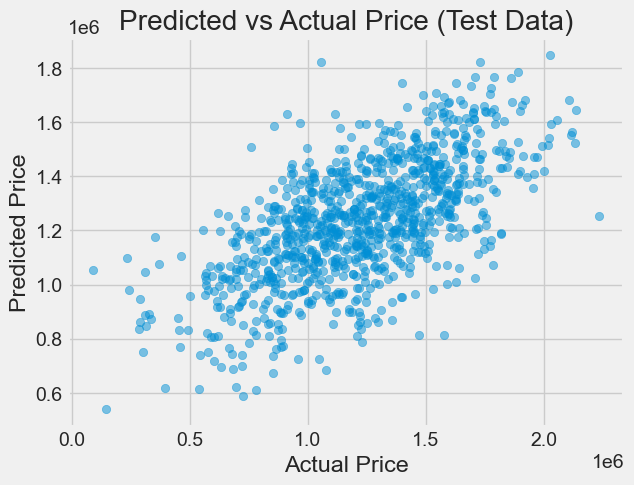

In [20]:
plt.scatter(y_test, y_pred_simple, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price (Test Data)")
plt.grid(True)
plt.show()

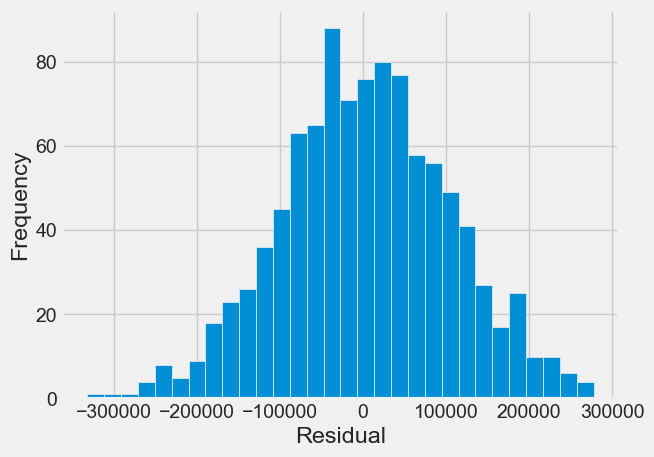

In [21]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

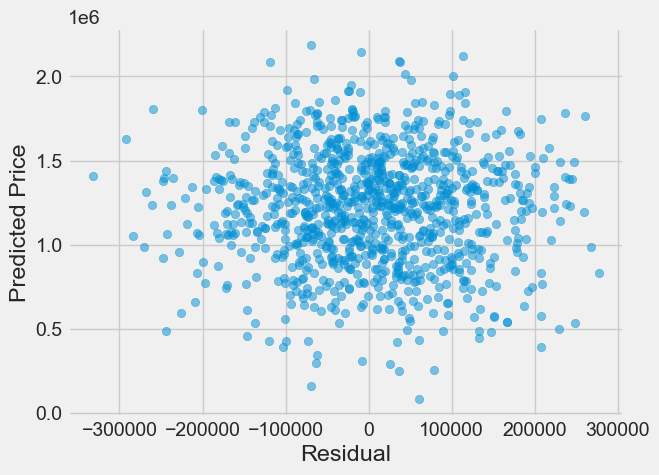

In [22]:
plt.scatter(residuals, y_pred, alpha=0.5)
plt.xlabel("Residual")
plt.ylabel("Predicted Price")
plt.show()

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, and is easier to calculate derivations.
- **RMSE** RMSE is more interpretable.

> All of these are **loss functions**,

Tasks:

1.  What is the interpretation of the $R^2$ score?

2.  Pack these values into a Pandas data frame

#  What is the interpretation of the $R^2$ score?
R squared score closest to 1 means that our linear regression is performing very well. 1 is perfect.

0 is really bad.

## pack these values into a pandas data frame ???? i dont understand

# Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

Tasks:

1.  Fit the data to polynomial model of degree 2
2.  Repeat the analysis from the simple regression and show the loss functions
3.  Did polynomoial regression improve the fit? how did you come to that conclusion?

In [24]:
from sklearn.preprocessing import PolynomialFeatures


In [33]:
x = df_house[['Avg. Area Income']]
y = df_house['Price']

# 2. Split into train/test using just x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Polynomial transform
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# 4. Fit model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# 5. Predict
y_pred_poly_simple = model.predict(x_test_poly)

In [28]:

# Create polynomial transformer
poly = PolynomialFeatures(degree=2)

# Transform training and test data
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

In [34]:
print_evaluate(y_test, y_pred_poly_simple) # poly regression 1 feature

MAE: 217021.5164283381
MSE: 74196648598.46884
RMSE: 272390.61767702067
R2 Square 0.39693433424207525
__________________________________


In [30]:
print_evaluate(y_test, y_pred_poly) # poly regression 5 features

MAE: 81809.26019735962
MSE: 10524651349.41714
RMSE: 102589.72341037448
R2 Square 0.9160278412613904
__________________________________


In [31]:
print_evaluate(y_test, y_pred_simple) # linear regression 1 feature

MAE: 217802.21672884392
MSE: 74165430706.10806
RMSE: 272333.30810994835
R2 Square 0.408262457975336
__________________________________


In [32]:
print_evaluate(y_test, y_pred) # linear regression all 5 features

MAE: 81519.12828407687
MSE: 10454403229.54705
RMSE: 102246.77613278107
R2 Square 0.9165883240818637
__________________________________
